In [1]:
#importing necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import pandas as pd     

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Yales Dataset** 
* 15 classes (distinct people) and 11 images (distinct emotions) per class in dataset

In [3]:
os.listdir('/content/drive/MyDrive/yalefaces') 

['subject01.gif',
 'subject01.glasses.gif',
 'subject01.happy',
 'subject01.noglasses',
 'subject01.leftlight',
 'subject01.normal',
 'subject01.sad',
 'subject01.rightlight',
 'subject01.surprised',
 'subject01.sleepy',
 'subject01.wink',
 'subject02.glasses',
 'subject02.centerlight',
 'subject02.happy',
 'subject02.noglasses',
 'subject02.leftlight',
 'subject02.normal',
 'subject02.rightlight',
 'subject02.sad',
 'subject02.sleepy',
 'subject02.surprised',
 'subject03.centerlight',
 'subject02.wink',
 'subject03.happy',
 'subject03.glasses',
 'subject03.leftlight',
 'subject03.normal',
 'subject03.noglasses',
 'subject03.rightlight',
 'subject03.sleepy',
 'subject03.sad',
 'subject03.surprised',
 'subject03.wink',
 'subject04.centerlight',
 'subject04.glasses',
 'subject04.happy',
 'subject04.leftlight',
 'subject04.noglasses',
 'subject04.normal',
 'subject04.rightlight',
 'subject04.sleepy',
 'subject04.surprised',
 'subject04.wink',
 'subject05.centerlight',
 'subject05.happy',


In [4]:
img_path = "/content/drive/MyDrive/yalefaces"
img_path

'/content/drive/MyDrive/yalefaces'

In [5]:
img_name = os.listdir('/content/drive/MyDrive/yalefaces') 

In [6]:
len(img_name)

165

In [7]:
images = list(os.listdir(img_path))

In [8]:
images.sort()
images

['subject01.gif',
 'subject01.glasses.gif',
 'subject01.happy',
 'subject01.leftlight',
 'subject01.noglasses',
 'subject01.normal',
 'subject01.rightlight',
 'subject01.sad',
 'subject01.sleepy',
 'subject01.surprised',
 'subject01.wink',
 'subject02.centerlight',
 'subject02.glasses',
 'subject02.happy',
 'subject02.leftlight',
 'subject02.noglasses',
 'subject02.normal',
 'subject02.rightlight',
 'subject02.sad',
 'subject02.sleepy',
 'subject02.surprised',
 'subject02.wink',
 'subject03.centerlight',
 'subject03.glasses',
 'subject03.happy',
 'subject03.leftlight',
 'subject03.noglasses',
 'subject03.normal',
 'subject03.rightlight',
 'subject03.sad',
 'subject03.sleepy',
 'subject03.surprised',
 'subject03.wink',
 'subject04.centerlight',
 'subject04.glasses',
 'subject04.happy',
 'subject04.leftlight',
 'subject04.noglasses',
 'subject04.normal',
 'subject04.rightlight',
 'subject04.sad',
 'subject04.sleepy',
 'subject04.surprised',
 'subject04.wink',
 'subject05.centerlight',
 '

(243, 320)

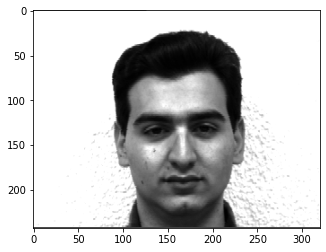

In [42]:
# Checking the dimension of a image
img = imread(os.path.join(img_path,'subject15.normal'))
plt.imshow(img,cmap=plt.cm.gray)
img.shape  

In [9]:
all_images = []
for img in images:
    image_matrix = imread(os.path.join(img_path,img))
    image=image_matrix.flatten()                              #converting the images to a column vector of dimension 243*320 = 77760
    all_images.append(image)

In [10]:
X=np.array(all_images)

In [51]:
average_img = np.array(X.mean(0))
average_img = np.reshape(average_img,(243,320))

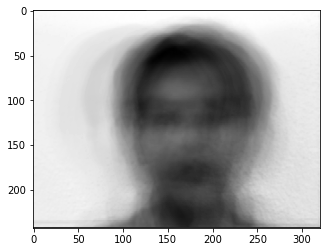

In [52]:
plt.imshow(average_img,cmap='gray')     #Average Image with which we are standardising

In [11]:
label=[]
for i in range(15):
  label.extend(11*[i])                                        #creating the Y labels

In [12]:
Y=np.array(label)

In [13]:
X.shape,Y.shape

((165, 77760), (165,))

In [14]:
#spliting in train test set
from sklearn.model_selection import train_test_split
X_train_unstandardised, X_test_unstandardised, y_train, y_test = train_test_split(X, Y, test_size=0.09, random_state=42)

In [15]:
X_train_unstandardised.shape,X_test_unstandardised.shape,y_train.shape,y_test.shape

((150, 77760), (15, 77760), (150,), (15,))

**Standardisation**

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unstandardised)
X_test = sc.transform (X_test_unstandardised)
np.round(X_train.mean(0)),np.round(X_train.var(0)),np.round(X_test.mean(0)),np.round(X_test.var(0))

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 1., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((150, 77760), (15, 77760), (150,), (15,))

**Correlation**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh_correlation = KNeighborsClassifier(n_neighbors=15)
neigh_correlation.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [19]:
correlation_predictions=neigh_correlation.predict(X_test)

In [20]:
correlation_accuracy=sum((correlation_predictions-y_test)==0)/len(correlation_predictions-y_test)
correlation_accuracy

0.6

**Eigenface PCA**

In [21]:
from sklearn.decomposition import PCA
pca_eigenface = PCA(n_components=30)
X_train_PCA_eigenface = pca_eigenface.fit_transform(X_train)
X_test_PCA_eigenface = pca_eigenface.transform(X_test)

In [22]:
X_train_PCA_eigenface.shape

(150, 30)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh_eigenface = KNeighborsClassifier(n_neighbors=15)
neigh_eigenface.fit(X_train_PCA_eigenface,y_train)

KNeighborsClassifier(n_neighbors=15)

In [24]:
eigenface_predictions=neigh_eigenface.predict(X_test_PCA_eigenface)

In [25]:
eigenface_accuracy=sum((eigenface_predictions-y_test)==0)/len(eigenface_predictions-y_test)
eigenface_accuracy

0.8

Eigenface PCA updated

In [26]:
from sklearn.decomposition import PCA
pca_eigenface_updated = PCA(n_components=3)
X_train_PCA_eigenface = pca_eigenface.fit_transform(X_train)
X_test_PCA_eigenface = pca_eigenface.transform(X_test)

In [27]:
X_train_PCA_eigenface.shape

(150, 30)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neigh_eigenface = KNeighborsClassifier(n_neighbors=15)
neigh_eigenface.fit(X_train_PCA_eigenface,y_train)

KNeighborsClassifier(n_neighbors=15)

In [29]:
eigenface_predictions=neigh_eigenface.predict(X_test_PCA_eigenface)

In [30]:
eigenface_accuracy=sum((eigenface_predictions-y_test)==0)/len(eigenface_predictions-y_test)
eigenface_accuracy

0.8

**Fisherface_PCA**

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=135)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

In [32]:
X_train_PCA.shape

(150, 135)

Eigenface_PCA(extra - 135 PCA)

In [33]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh_eigen = KNeighborsClassifier(n_neighbors=15)
# neigh_eigen.fit(X_train_PCA,y_train)

In [34]:
# eigenface_prediction=neigh_eigen.predict(X_test_PCA)

In [35]:
# eigenface_accuracy=sum((eigenface_prediction-y_test)==0)/len(eigenface_prediction-y_test)
# eigenface_accuracy

**Fisherface_LDA**

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components= 14)
X_train_LDA = lda.fit_transform(X_train_PCA, y_train)
X_test_LDA = lda.transform(X_test_PCA)

In [37]:
X_train_LDA.shape

(150, 14)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train_LDA,y_train)

KNeighborsClassifier(n_neighbors=15)

In [39]:
fisherface_prediction=neigh.predict(X_test_LDA)

In [40]:
fisherface_accuracy=sum((fisherface_prediction-y_test)==0)/len(fisherface_prediction-y_test)
fisherface_accuracy

1.0

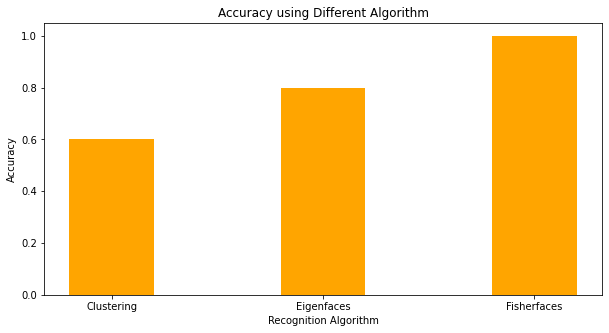

In [43]:
data = {'Clustering':0.6, 'Eigenfaces':0.8, 'Fisherfaces':1,
        }
methods = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, accuracy, color ='orange',
        width = 0.4)
 
plt.xlabel("Recognition Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy using Different Algorithm")
plt.show()